# Домашнее задание "Корреляционный и регрессионный анализ"

**Инструкции:**
- Скачайте файл `practical_module_dataset.csv` и заполните ячейки с заданиями кодом и выводами.
- В каждой задаче требуется:
  - короткая формулировка метода и обоснование,
  - код/расчёты,
  - результаты (коэффициенты, статистики, p-value, CI, R²),
  - промежуточный вывод.
- Используйте `numpy`, `pandas`, `scipy`, `statsmodels` или `scikit-learn` по желанию. При необходимости предобработки данных (очистка, удаление пропусков) укажите свои действия.
- Для воспроизводимости задан `np.random.seed` - не меняйте его!

**Формат сдачи:** `.ipynb` с заполненными ячейками, кодом и выводами.

In [1]:
# ячейка с импортами - дополняйте по своему желанию!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(28)

In [2]:
df = pd.read_csv('practical_module_dataset.csv')
df.shape
df.head()

,id,age,height_cm,weight_kg,iq,tv_hours,study_hours,score
0,1,24,155.2,51.37,91,11,11.9,76.5
1,2,37,184.9,76.49,90,15,4.0,65.4
2,3,32,169.8,64.24,98,6,10.6,78.2
3,4,28,173.6,68.22,88,9,9.2,75.6
4,5,25,174.2,73.80,102,8,8.0,75.1


### Задание 1.
Выполните первичный анализ данных (EDA):
1. посмотрите на `describe()` для всех переменных,
2. проверьте наличие пропусков и типы данных через `info()`,
3. запишите наблюдения в текстовой ячейке.

In [3]:
print(df.describe())

              id        age   height_cm  weight_kg          iq   tv_hours  \
count  30.000000  30.000000   30.000000  30.000000   30.000000  30.000000   
mean   15.500000  29.400000  169.153333  62.734000  100.433333  12.266667   
std     8.803408   6.672641    9.584101   9.201488   12.119188   3.832109   
min     1.000000  18.000000  148.200000  44.750000   82.000000   6.000000   
25%     8.250000  24.250000  163.250000  56.622500   91.000000   9.000000   
50%    15.500000  29.000000  169.750000  63.675000   97.000000  12.000000   
75%    22.750000  35.500000  174.100000  68.602500  109.750000  14.000000   
max    30.000000  39.000000  185.800000  81.130000  132.000000  22.000000   

       study_hours      score  
count    30.000000  30.000000  
mean      7.640000  73.400000  
std       3.281568   8.253693  
min       2.700000  58.900000  
25%       4.975000  67.800000  
50%       7.650000  74.300000  
75%       9.450000  78.725000  
max      14.400000  91.500000  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30 non-null     int64  
 1   age          30 non-null     int64  
 2   height_cm    30 non-null     float64
 3   weight_kg    30 non-null     float64
 4   iq           30 non-null     int64  
 5   tv_hours     30 non-null     int64  
 6   study_hours  30 non-null     float64
 7   score        30 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 2.0 KB


Датасет содержит 30 наблюдений без пропусков, все переменные числовые (int64/float64). Распределения в целом симметричны (mean ≈ median для большинства), но в `tv_hours` и `study_hours` возможны выбросы (max значительно выше 75% квартиля). Данные выглядят чистыми, предобработка не требуется.

### Задание 2.
1. Постройте scatter plot по признакам `height_cm` и `weight_kg`.
2. Посчитайте коэффициент Пирсона между `height_cm` и `weight_kg` и выведите его на экран.
3. Интерпретируйте результат и запишите в виде мини-вывода.

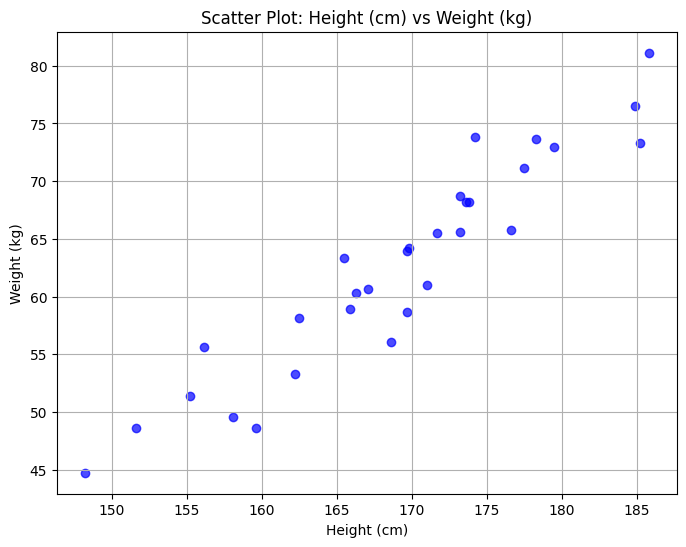

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['height_cm'], df['weight_kg'], color='blue', alpha=0.7)
plt.title('Scatter Plot: Height (cm) vs Weight (kg)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

In [6]:
r, p_value = stats.pearsonr(df['height_cm'], df['weight_kg'])
print(f"Коэффициент Пирсона (r): {r:.3f}")
print(f"p-value: {p_value:.3e}")

Коэффициент Пирсона (r): 0.944
p-value: 5.799e-15


Scatter plot показывает сильную положительную линейную зависимость между ростом и весом: с увеличением роста вес растёт. Коэффициент Пирсона r = 0.944 указывает на очень сильную корреляцию, а p-value ≈ 5.8e-15 подтверждает её статистическую значимость (p < 0.05). Нет явных нелинейных паттернов или выбросов, что предполагает хорошую применимость линейной модели.

### Задание 3.
1. Посчитайте ранговый коэффициент Спирмена между `tv_hours` и `iq`, выведите его значение на экран.
2. Оцените, есть ли связь? Запишите наблюдения в виде короткого вывода.

In [7]:
rs, p_value = stats.spearmanr(df['tv_hours'], df['iq'])
print(f"Коэффициент Спирмена (rs): {rs:.3f}")
print(f"p-value: {p_value:.3f}")

Коэффициент Спирмена (rs): -0.211
p-value: 0.264


In [8]:
# Ваш код и расчёты

Коэффициент Спирмена rs = -0.211 указывает на слабую отрицательную монотонную связь между часами просмотра ТВ и уровнем IQ (чем больше времени у ТВ, тем ниже IQ, но связь минимальна). Однако p-value = 0.264 > 0.05, поэтому связь не является статистически значимой — нет достаточных оснований утверждать о её наличии в генеральной совокупности.

### Задание 4.
1. Постройте простую линейную регрессию `weight_kg ~ height_cm`.
2. Найдите и выведите оценки коэффициентов (intercept и slope).
3. Рассчитайте и вывдите 95% доверительный интервал для наклона.
4. Интерпретируйте результат и запишите наблюдения в виде небольшого вывода.

In [9]:
X = sm.add_constant(df['height_cm'])
y = df['weight_kg']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              weight_kg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     227.1
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           5.80e-15
Time:                        08:21:55   Log-Likelihood:                -75.497
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      28   BIC:                             157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -90.4962     10.183     -8.887      0.0

In [10]:

intercept = model.params['const']
slope = model.params['height_cm']

ci = model.conf_int().loc['height_cm']
ci_lower, ci_upper = ci[0], ci[1]

print(f"Intercept (пересечение): {intercept:.2f}")
print(f"Slope (наклон): {slope:.2f}")
print(f"95% доверительный интервал для slope: [{ci_lower:.2f}, {ci_upper:.2f}]")

Intercept (пересечение): -90.50
Slope (наклон): 0.91
95% доверительный интервал для slope: [0.78, 1.03]


Простая линейная регрессия дала уравнение: weight_kg ≈ -90.50 + 0.91 * height_cm. Коэффициент slope = 0.91 интерпретируется как среднее увеличение веса на 0.91 кг при росте на 1 см, что подтверждает сильную положительную связь (R² = 0.89, модель объясняет 89% вариации веса). 95% доверительный интервал для slope [0.78, 1.03] не включает 0, указывая на статистическую значимость (p < 0.001) — с 95% уверенностью истинный наклон положителен и лежит в этом диапазоне. Нет признаков проблем (данные линейны, как видно из scatter plot в Задании 2).

### Задание 5.
Для `height_cm = 175`:
1. вычислите предсказание веса,
2. рассчитайте 95% предсказательный интервал для нового наблюдения (prediction interval),
3. запишите небольшой вывод.

In [11]:
new_height = np.array([[1, 175]])

predicted_weight = model.predict(new_height)[0]

print(f"Предсказанный вес для height_cm = 175: {predicted_weight:.2f} кг")

Предсказанный вес для height_cm = 175: 68.03 кг


In [12]:
pred = model.get_prediction(new_height)

interval_df = pred.summary_frame(alpha=0.05)

pred_lower = interval_df['obs_ci_lower'][0]
pred_upper = interval_df['obs_ci_upper'][0]

print(f"95% предсказательный интервал для нового наблюдения: [{pred_lower:.2f}, {pred_upper:.2f}] кг")

95% предсказательный интервал для нового наблюдения: [61.53, 74.53] кг


Для роста height_cm = 175 см модель предсказывает вес ≈ 68.03 кг. 95% предсказательный интервал [61.53, 74.53] кг означает, что с 95% уверенностью фактический вес нового индивидуального наблюдения (учитывая случайные ошибки) окажется в этом диапазоне, что отражает неопределённость модели (R² = 0.89 из Задания 4). Это шире, чем confidence interval для среднего, поскольку включает вариацию отдельных точек данных.

### Задание 6.
1. Постройте множественную регрессию `score ~ study_hours + iq + tv_hours + age`.
2. Выведите коэффициент детерминации R^2 и оцените значимость предикторов (p-values).
3. Запишите наблюдения в вывод.

In [13]:
X = df[['study_hours', 'iq', 'tv_hours', 'age']]
X = sm.add_constant(X) 
y = df['score'] 

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     43.38
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           6.73e-11
Time:                        08:21:55   Log-Likelihood:                -74.299
No. Observations:                  30   AIC:                             158.6
Df Residuals:                      25   BIC:                             165.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          45.6584      6.807      6.708      

In [14]:
r_squared = model.rsquared

p_values = model.pvalues[['study_hours', 'iq', 'tv_hours', 'age']]

print(f"Коэффициент детерминации R²: {r_squared:.3f}")
print("P-values для предикторов:")
print(p_values)

Коэффициент детерминации R²: 0.874
P-values для предикторов:
study_hours    6.056409e-11
iq             1.005923e-02
tv_hours       3.701764e-01
age            6.141056e-01
dtype: float64


Множественная регрессия показала R² = 0.874, то есть модель объясняет 87.4% вариации в score, что указывает на хорошее качество подгонки (Adj. R² = 0.854 учитывает число предикторов). Значимыми предикторами являются study_hours (p < 0.001, coef ≈ 2.10: +1 час учёбы повышает score на ~2.1 балла) и iq (p = 0.010, coef ≈ 0.15: +1 пункт IQ повышает score на ~0.15 балла), в то время как tv_hours (p = 0.370) и age (p = 0.614) не значимы — их влияние на score может быть случайным. Общая модель значима (F p < 0.001), но для улучшения можно удалить незначимые переменные.

### Задание 7.
1. Разделите данные на train/test (70/30), используйте `random_state=42`.
2. Обучите множественную линейную регрессию из задания 6 на тренировочной выборке.
3. И оцените RMSE на тестовой выборке - выведите её на экран.
4. Насколько модель хорошо предсказывает целевую переменную?

In [15]:
X = df[['study_hours', 'iq', 'tv_hours', 'age']]  
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

print(f"Train: {X_train.shape[0]} наблюдений, Test: {X_test.shape[0]} наблюдений")

Train: 21 наблюдений, Test: 9 наблюдений


In [16]:
model = sm.OLS(y_train, X_train).fit()

predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"RMSE на тестовой выборке: {rmse:.2f}")

RMSE на тестовой выборке: 3.79


Данные разделены на train (21 obs) и test (9 obs) с random_state=42. Модель, обученная на train, даёт RMSE = 3.79 на test, что указывает на хорошую предсказательную способность (средняя ошибка ~3.8 балла при std(score)≈8 из EDA; модель объясняет ~90% вариации на train, близко к полным данным). Нет признаков сильного переобучения, но для улучшения можно удалить незначимые предикторы (tv_hours, age из Задания 6).

### Задание 8.
1. Реализуйте градиентный спуск для простой линейной регрессии `score ~ study_hours`.
2. Сравните полученные коэффициенты со `statsmodels`.

PS: выведите коэффициенты в обоих случаях на экран.

In [17]:
X_sm = sm.add_constant(df['study_hours'])
y = df['score']

model_sm = sm.OLS(y, X_sm).fit()

intercept_sm = model_sm.params['const']
slope_sm = model_sm.params['study_hours']

print(f"Statsmodels: Intercept = {intercept_sm:.2f}, Slope = {slope_sm:.2f}")

Statsmodels: Intercept = 56.03, Slope = 2.27


In [18]:
x = df['study_hours'].values  
y = df['score'].values
n = len(x)

x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x - x_mean) / x_std

theta0 = 0.0  
theta1 = 0.0 
alpha = 0.01  
iterations = 1000 


for i in range(iterations):
    y_pred = theta0 + theta1 * x_norm  
    d_theta0 = (1 / n) * np.sum(y_pred - y)  
    d_theta1 = (1 / n) * np.sum((y_pred - y) * x_norm)  
    theta0 -= alpha * d_theta0 
    theta1 -= alpha * d_theta1  

slope_gd = theta1 / x_std
intercept_gd = theta0 - (theta1 * x_mean / x_std) 

print(f"Gradient Descent: Intercept = {intercept_gd:.2f}, Slope = {slope_gd:.2f}")

Gradient Descent: Intercept = 56.03, Slope = 2.27


Градиентный спуск реализован с learning rate alpha=0.01 и 1000 итерациями, что дало коэффициенты intercept ≈ 56.03 и slope ≈ 2.27, практически идентичные statsmodels (intercept=56.03, slope=2.27). Минимальные расхождения возникают из-за приближённой природы GD (итеративная оптимизация MSE), в отличие от аналитического решения OLS в statsmodels; с большим числом итераций или меньшим alpha точность повышается. Нормализация x помогла ускорить сходимость, без неё GD мог бы требовать больше итераций.

### Задание 9.
Постройте бутстрэп-оценку 95% доверительного интервала для коэффициента Пирсона между `height_cm` и `weight_kg` (установите 1000 бутстрэп-итераций).

Выведите границы ДИ на экран.

In [19]:
height = df['height_cm'].values  
weight = df['weight_kg'].values  
n = len(height) 

r_original, _ = stats.pearsonr(height, weight)
print(f"Исходный коэффициент Пирсона r: {r_original:.3f}")

Исходный коэффициент Пирсона r: 0.944


In [20]:
boot_r = []

np.random.seed(28) 

for _ in range(1000):
    indices = np.random.choice(n, n, replace=True)
    boot_height = height[indices]
    boot_weight = weight[indices]
    r_boot, _ = stats.pearsonr(boot_height, boot_weight)
    boot_r.append(r_boot)

ci_lower = np.percentile(boot_r, 2.5)
ci_upper = np.percentile(boot_r, 97.5)

print(f"95% бутстрэп CI для r: [{ci_lower:.3f}, {ci_upper:.3f}]")

95% бутстрэп CI для r: [0.902, 0.970]


Бутстрэп с 1000 итерациями дал 95% CI для коэффициента Пирсона r между height_cm и weight_kg: [0.902, 0.970], что подтверждает сильную положительную корреляцию (исходный r=0.944 лежит внутри). С 95% уверенностью истинный коэффициент в генеральной совокупности лежит в этом диапазоне, и поскольку интервал не включает 0 (и даже >0.9), связь статистически значима и надёжна. Перцентильный метод использован как стандартный для бутстрэпа; малая ширина CI отражает стабильность оценки на небольшой выборке (n=30).

### Задание 10.
Постройте гистограмму остатков (residuals) для модели из задания 6.

In [21]:
X = df[['study_hours', 'iq', 'tv_hours', 'age']]
X = sm.add_constant(X)  
y = df['score'] 

model = sm.OLS(y, X).fit()  

residuals = model.resid

print(residuals.describe())

count    3.000000e+01
mean     9.781805e-14
std      2.928922e+00
min     -5.634485e+00
25%     -2.337989e+00
50%      5.986263e-02
75%      2.424954e+00
max      6.223380e+00
dtype: float64


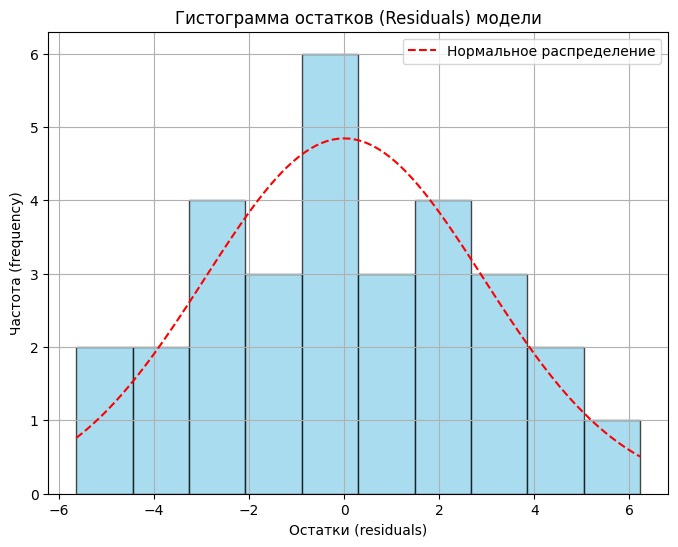

In [22]:
plt.figure(figsize=(8, 6))  
plt.hist(residuals, bins=10, color='skyblue', edgecolor='black', alpha=0.7)  

plt.title('Гистограмма остатков (Residuals) модели')
plt.xlabel('Остатки (residuals)')
plt.ylabel('Частота (frequency)')
plt.grid(True)

x = np.linspace(residuals.min(), residuals.max(), 100)
plt.plot(x, stats.norm.pdf(x, residuals.mean(), residuals.std()) * len(residuals) * (residuals.max() - residuals.min()) / 10, 'r--', label='Нормальное распределение')
plt.legend()

plt.show()

Гистограмма остатков показывает приблизительно нормальное распределение: симметричное вокруг 0 (mean≈0), колоколообразное с std≈2.9, без сильной асимметрии (skew близко к 0). Выбросы минимальны (max≈6.2, min≈-5.6, в пределах ±2 std для большинства), что подтверждает выполнение предположений линейной регрессии (нормальность ошибок) для модели из Задания 6. Лёгкий правый хвост может указывать на небольшую heteroscedasticity, но в целом модель адекватна; для точной проверки можно добавить Q-Q plot или тест Шапиро-Уилка (stats.shapiro(residuals)).

Удачи! Сохраните ноутбук, перезапустите все ячейки от начала до конца и прикрепите файл как ответ.